Find some documentation about sparse subsetting [here](https://toolbox-docs.marine.copernicus.eu/en/v2.1.0b1/usage/subset-usage.html#sparse-data-subsetting).  


Disclaimer: INSITU datasets are sparse and hence the possible extent of the request can be huge even for a few data. Please be mindful of restricting the area of the request (on all dimensions). 

In [1]:
!pip install copernicusmarine==2.1.0b1 --pre

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 75.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
  Attempting uninstall: copernicusmarine
    Found existing installation: copernicusmarine 2.0.1
    Uninstalling copernicusmarine-2.0.1:
      Successfully uninstalled copernicusmarine-2.0.1


In [2]:
import copernicusmarine
# version should be 2.1.0b1 if not maybe it's necessary to reload the python kernel
copernicusmarine.__version__

'2.1.0b1'

In [3]:
import pandas as pd

The whole subsetting should work the same as subsetting gridded datasets. The result is different as it comes as a CSV, pandas.DataFrame or Parquet file. You can read more about it in [the documentation](https://toolbox-docs.marine.copernicus.eu/en/v2.1.0b1/usage/subset-usage.html#sparse-data-subsetting).

In [4]:
dataset_insitu = "cmems_obs-ins_arc_phybgcwav_mynrt_na_irr"
# subset, save locally
response = copernicusmarine.subset(
      dataset_id=dataset_insitu,
      minimum_latitude=45,
      maximum_latitude=90,
      minimum_longitude=-45,
      maximum_longitude=5,
      minimum_depth=0,
      maximum_depth=10,
      variables=["TEMP"],
      start_datetime="2023-11-25T00:00:00",
      end_datetime="2024-11-26T03:00:00",
      dataset_part="history"
)

WARNING - 2025-04-15T09:17:08Z - Using a pre-release or a non-official version of the client. Client version: 2.1.0b1
INFO - 2025-04-15T09:17:08Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:

  ldrouineau


Copernicus Marine password:

  ········


INFO - 2025-04-15T09:17:18Z - Selected dataset version: "202311"
INFO - 2025-04-15T09:17:18Z - Selected dataset part: "history"


In [31]:
# and open
df = pd.read_csv(response.file_path)
df.head(10)

,entity_id,entity_type,time,longitude,latitude,depth,is_approx_elevation,value,value_qc,variable
0,6401593___DB,DB,1711238400,-6.8687,72.5782,0.5,0,-0.68,1,TEMP
1,6401593___DB,DB,1711242000,-6.8688,72.5731,0.5,0,-0.66,1,TEMP
2,6401593___DB,DB,1711245600,-6.8655,72.5688,0.5,0,-0.56,1,TEMP
3,6401593___DB,DB,1711249200,-6.8622,72.5625,0.5,0,-0.51,1,TEMP
4,6401593___DB,DB,1711252800,-6.8699,72.5602,0.5,0,-0.53,1,TEMP
5,6401593___DB,DB,1711256400,-6.8815,72.5568,0.5,0,-0.51,1,TEMP
6,6401593___DB,DB,1711260000,-6.8931,72.5528,0.5,0,-0.55,1,TEMP
7,6401593___DB,DB,1711263600,-6.9024,72.5492,0.5,0,-0.59,1,TEMP
8,6401593___DB,DB,1711267200,-6.9181,72.5438,0.5,0,-0.59,1,TEMP
9,6401593___DB,DB,1711270800,-6.9330,72.5390,0.5,0,-0.57,1,TEMP


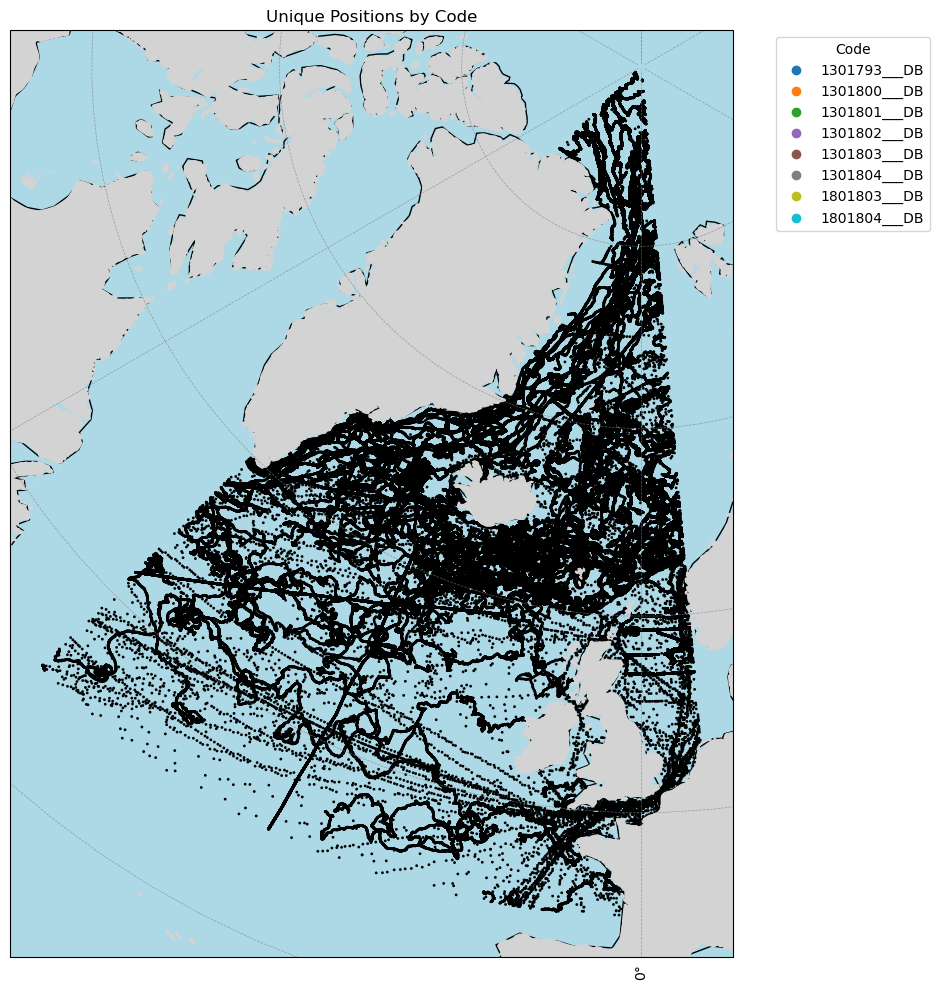

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

# Example dataframe
# Remove duplicates on 'code', 'latitude', 'longitude'
unique_locs = df.drop_duplicates(subset=['entity_id', 'latitude', 'longitude'])

# Plot with Cartopy
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
land_50m = NaturalEarthFeature('physical', 'land', '50m',
                               edgecolor='face',
                               facecolor='lightgray')

ax.add_feature(land_50m)
#ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
#ax.add_feature(cfeature.RIVERS)

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Scatter plot with color by 'code'
scatter = ax.scatter(
    unique_locs['longitude'],
    unique_locs['latitude'],
    c=unique_locs['entity_id'].astype('category').cat.codes,  # color by code
    cmap='tab10',  # use a categorical colormap
    s=1,
    edgecolor='k',
    transform=ccrs.PlateCarree()
)

# Create legend with actual code names
handles, _ = scatter.legend_elements(prop="colors")
labels = unique_locs['entity_id'].astype('category').cat.categories
ax.legend(handles, labels, title="Code", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Unique Positions by Code")
plt.tight_layout()
plt.show()

In [4]:
# Or directly open
df2 = copernicusmarine.read_dataframe(
      dataset_id=dataset_insitu,
      minimum_latitude=45,
      maximum_latitude=90,
      minimum_longitude=-146.99,
      maximum_longitude=180,
      minimum_depth=0,
      maximum_depth=10,
      variables=["TEMP"],
      start_datetime="2023-11-25T00:00:00",
      end_datetime="2024-11-26T03:00:00",
      dataset_part="history",
)
df2.head(10)

NameError: name 'dataset_insitu' is not defined

In [10]:
# Another example with another dataset
dataset_ibi = "cmems_obs-ins_ibi_phybgcwav_mynrt_na_irr"
dataset_part = "latest"

df3 = copernicusmarine.read_dataframe(
      dataset_id=dataset_ibi,
      minimum_latitude=45,
      maximum_latitude=90,
      minimum_longitude=-146.99,
      maximum_longitude=180,
      minimum_depth=0,
      maximum_depth=10,
      variables=["TEMP"],
      start_datetime="2025-03-05",
      end_datetime="2025-03-15",
      dataset_part=dataset_part,
)
df3.head(10)

INFO - 2025-04-04T13:24:30Z - Selected dataset version: "202311"
INFO - 2025-04-04T13:24:30Z - Selected dataset part: "latest"


,entity_id,entity_type,time,longitude,latitude,depth,is_approx_elevation,value,value_qc,variable
0,6904142___PF,PF,1741344080,-34.60596,47.00951,5.9,1,13.855,1,TEMP
1,6904142___PF,PF,1741344080,-34.60596,47.00951,6.8,1,13.855,1,TEMP
2,6904142___PF,PF,1741344080,-34.60596,47.00951,8.0,1,13.856,1,TEMP
3,6904142___PF,PF,1741344080,-34.60596,47.00951,9.1,1,13.857,1,TEMP
4,6904142___PF,PF,1741344080,-34.60596,47.00951,9.9,1,13.856,1,TEMP
5,1902697___PF,PF,1741349040,-2.56237,46.30427,5.4,1,12.323,1,TEMP
6,1902697___PF,PF,1741349040,-2.56237,46.30427,6.4,1,12.324,1,TEMP
7,1902697___PF,PF,1741349040,-2.56237,46.30427,7.4,1,12.328,1,TEMP
8,1902697___PF,PF,1741349040,-2.56237,46.30427,8.4,1,12.328,1,TEMP
9,1902697___PF,PF,1741349040,-2.56237,46.30427,9.4,1,12.323,1,TEMP
